In [2]:
%pip install seaborn

<ipython-input-4-cc7faebbcaff>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  isis_yearly = isis_data.groupby('year').sum()
<ipython-input-4-cc7faebbcaff>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aq_yearly = aq_data.groupby('year').sum()


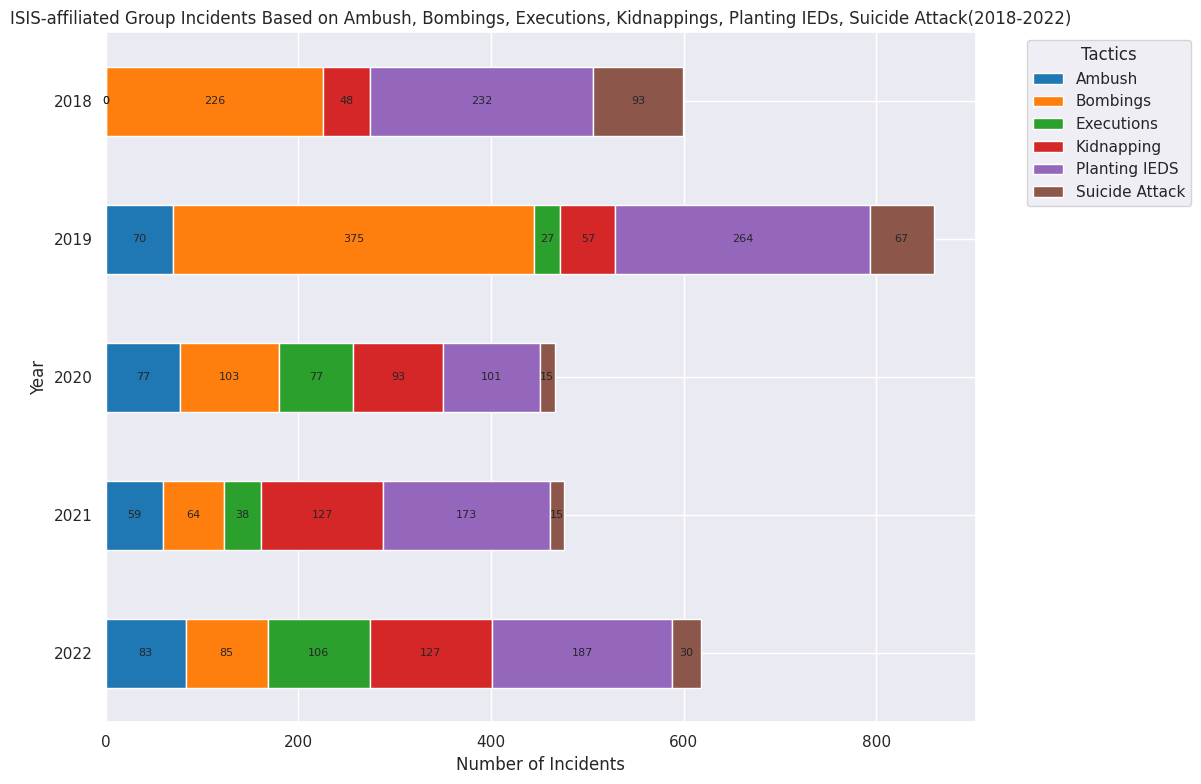

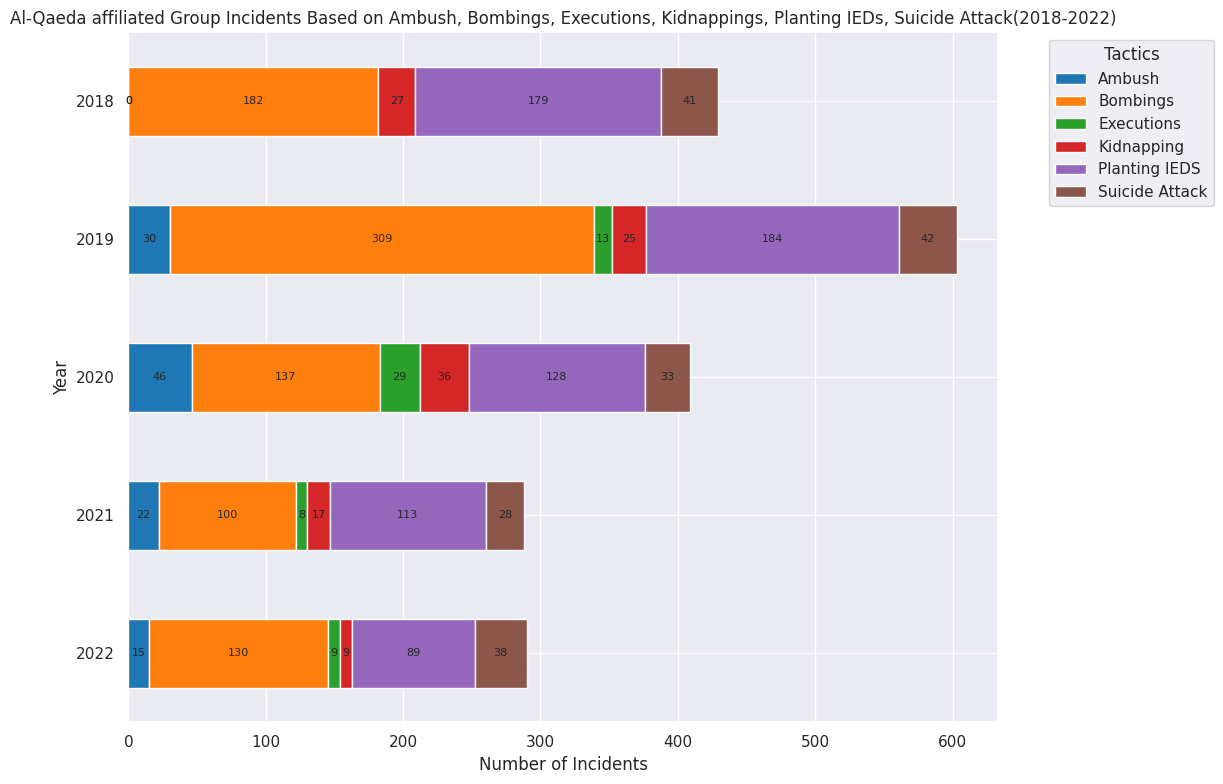

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = 'tacs.csv'
data = pd.read_csv(file_path)

# Filter the dataset for ISIS and AQ
isis_data = data[data['affiliated_group'] == 'ISIS']
aq_data = data[data['affiliated_group'] == 'AQ']

# Group the data by Year and sum up the incidents
isis_yearly = isis_data.groupby('year').sum()
aq_yearly = aq_data.groupby('year').sum()

# Sort the columns alphabetically, excluding 'Year' which is the index now
sorted_columns = sorted(isis_yearly.columns)

# Reorder the dataframe columns alphabetically for both ISIS and AQ
isis_yearly_sorted = isis_yearly[sorted_columns]
aq_yearly_sorted = aq_yearly[sorted_columns]

# Define a new color palette
color_palette = sns.color_palette('tab10')
sns.set(style="darkgrid")

# Function to add labels inside the bar segments for horizontal bar chart
def add_labels_to_stacked_bars(ax, df):
    for bars in ax.containers:
        # Use the datavalues of each bar segment for labels
        ax.bar_label(bars, label_type='center', fontsize=8)

# Redrawing the horizontal bar charts with sorted columns for ISIS
#print(type(isis_yearly_sorted))
isis_yearly_sorted = isis_yearly_sorted.loc[::-1].reset_index(drop=True).head()
fig, ax = plt.subplots(figsize=(12, 8))
isis_yearly_sorted.plot(kind='barh', stacked=True, ax=ax, color=color_palette, legend=False)
add_labels_to_stacked_bars(ax, isis_yearly_sorted)
ax.set_title('ISIS-affiliated Group Incidents Based on Ambush, Bombings, Executions, Kidnappings, Planting IEDs, Suicide Attack(2018-2022)')
ax.set_xlabel('Number of Incidents')  
ax.set_ylabel('Year')  
ax.legend(title='Tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_yticklabels([2022,2021,2020,2019,2018], rotation=0)
plt.tight_layout()
plt.show()

# Redrawing the horizontal bar charts with sorted columns for AQ
aq_yearly_sorted = aq_yearly_sorted.loc[::-1].reset_index(drop=True).head()
fig, ax = plt.subplots(figsize=(12, 8))
aq_yearly_sorted.plot(kind='barh', stacked=True, ax=ax, color=color_palette, legend=False)
add_labels_to_stacked_bars(ax, aq_yearly_sorted)
ax.set_title('Al-Qaeda affiliated Group Incidents Based on Ambush, Bombings, Executions, Kidnappings, Planting IEDs, Suicide Attack(2018-2022)')
ax.set_xlabel('Number of Incidents')  
ax.set_ylabel('Year')  
ax.legend(title='Tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_yticklabels([2022,2021,2020,2019,2018], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
%pip install jinja2
%pip install seaborn

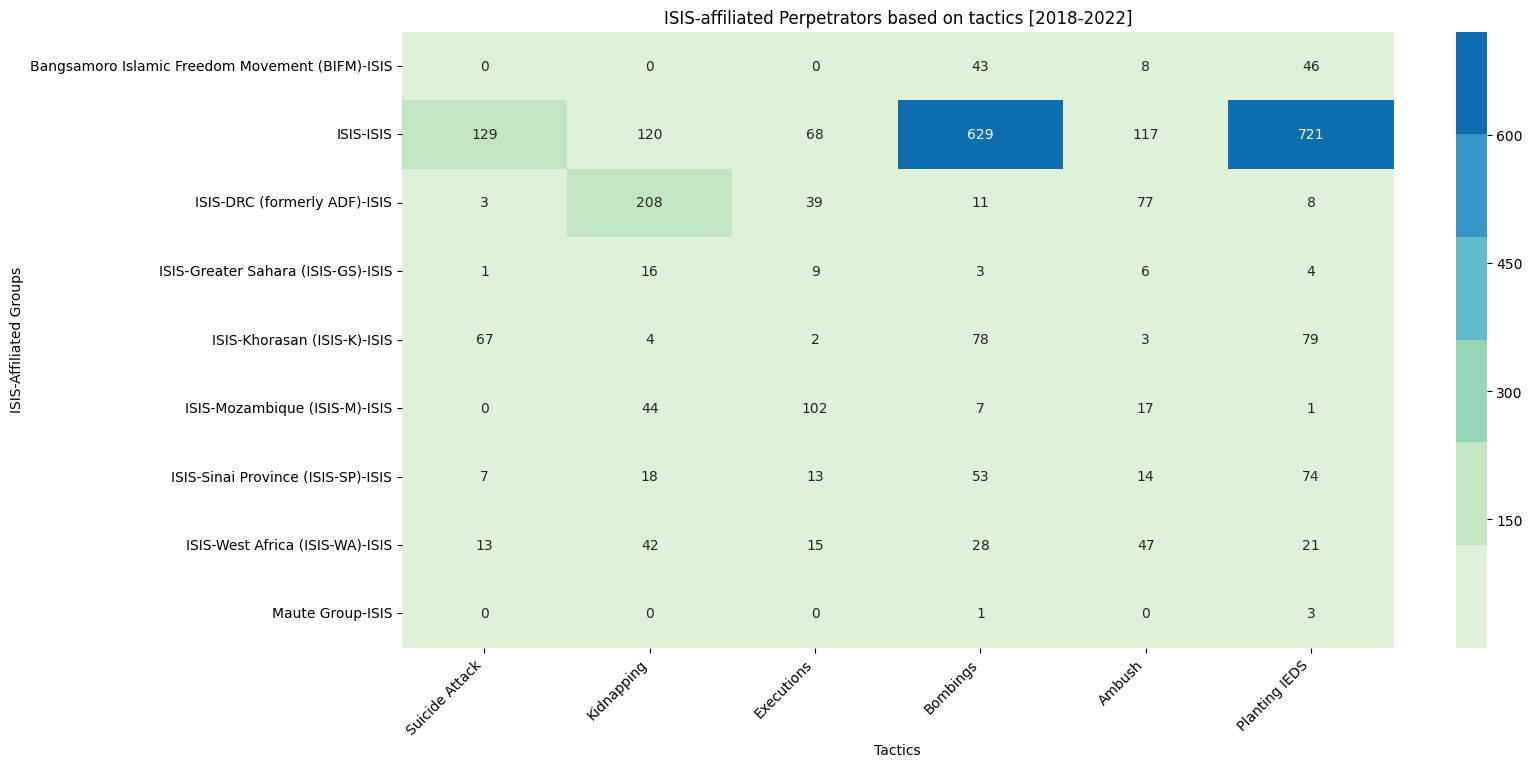

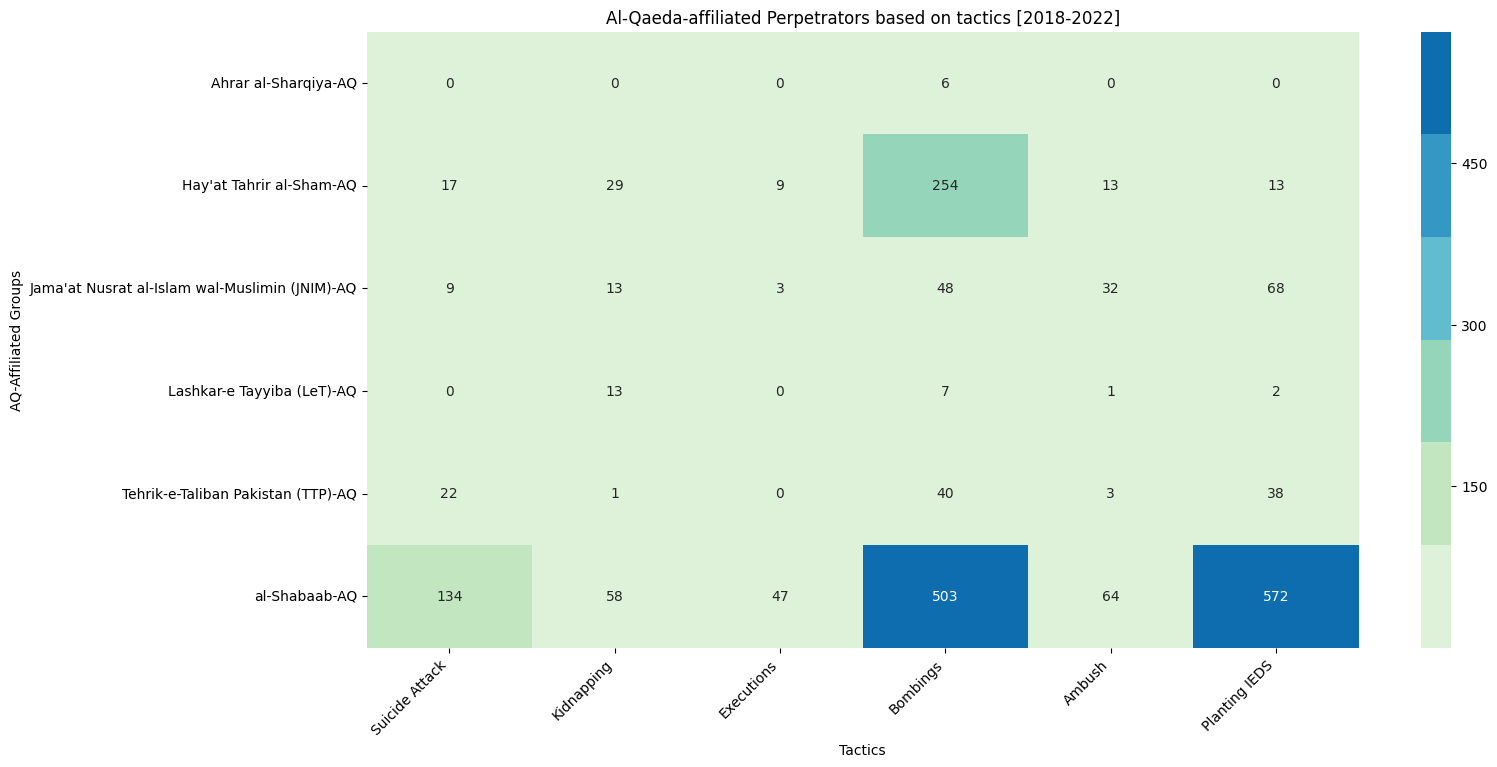

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Re-defining the columns to be selected
columns_to_select = ['Suicide Attack', 'Kidnapping', 'Executions', 'Bombings', 'Ambush', 'Planting IEDS', 'perp_name', 'affiliated_group']
file_path = 'tacs.csv'
data = pd.read_csv(file_path, usecols=columns_to_select)

# Grouping data by 'perp_name' and 'affiliated_group' and summing up the incidents for each tactic
frequency_table = data.groupby(['perp_name', 'affiliated_group']).sum().reset_index()

# Creating a pivot table-like frequency matrix using the groupby aggregate data
frequency_matrix = frequency_table.groupby(['perp_name', 'affiliated_group']).sum()

# Splitting the frequency matrix into two parts, one for ISIS and one for AQ
frequency_matrix_isis = frequency_matrix.loc[frequency_matrix.index.get_level_values('affiliated_group') == 'ISIS']
frequency_matrix_aq = frequency_matrix.loc[frequency_matrix.index.get_level_values('affiliated_group') == 'AQ']

# Binning the data for color categorization in the heatmaps
bins = [0, 150, 300, 450, 600, 750]
labels = bins[1:]

frequency_matrix_isis_binned = np.digitize(frequency_matrix_isis, bins, right=True)
frequency_matrix_aq_binned = np.digitize(frequency_matrix_aq, bins, right=True)

# Converting binned data back to original values for display
frequency_matrix_isis_binned = np.array([bins[i] for i in frequency_matrix_isis_binned.flatten()]).reshape(frequency_matrix_isis.shape)
frequency_matrix_aq_binned = np.array([bins[i] for i in frequency_matrix_aq_binned.flatten()]).reshape(frequency_matrix_aq.shape)

# Creating a custom colormap
cmap = sns.color_palette("GnBu", len(bins))

# Creating heatmaps with binned colors but showing actual data
plt.figure(figsize=(16, 8))
sns.heatmap(frequency_matrix_isis, annot=True, fmt='g', cmap=cmap, cbar_kws={'ticks': labels})
plt.title('ISIS-affiliated Perpetrators based on tactics [2018-2022]')
plt.xlabel('Tactics')
plt.ylabel('ISIS-Affiliated Groups')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(16, 8))
sns.heatmap(frequency_matrix_aq, annot=True, fmt='g', cmap=cmap, cbar_kws={'ticks': labels})
plt.title('Al-Qaeda-affiliated Perpetrators based on tactics [2018-2022]')
plt.xlabel('Tactics')
plt.ylabel('AQ-Affiliated Groups')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
%pip install seaborn

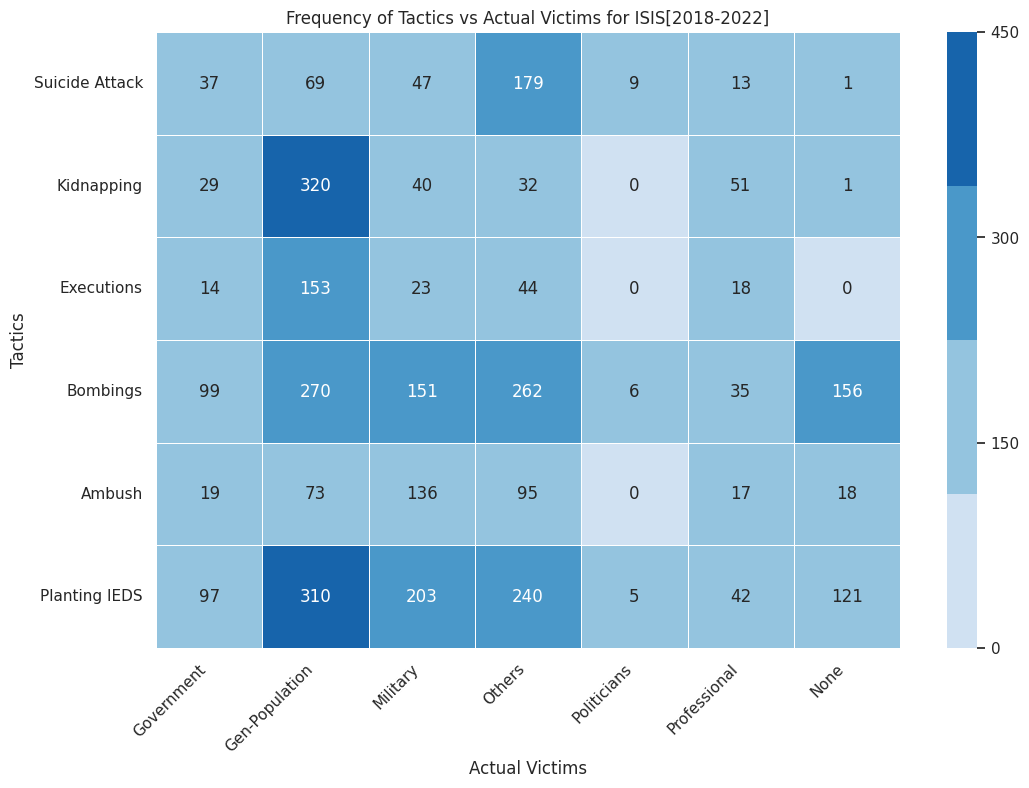

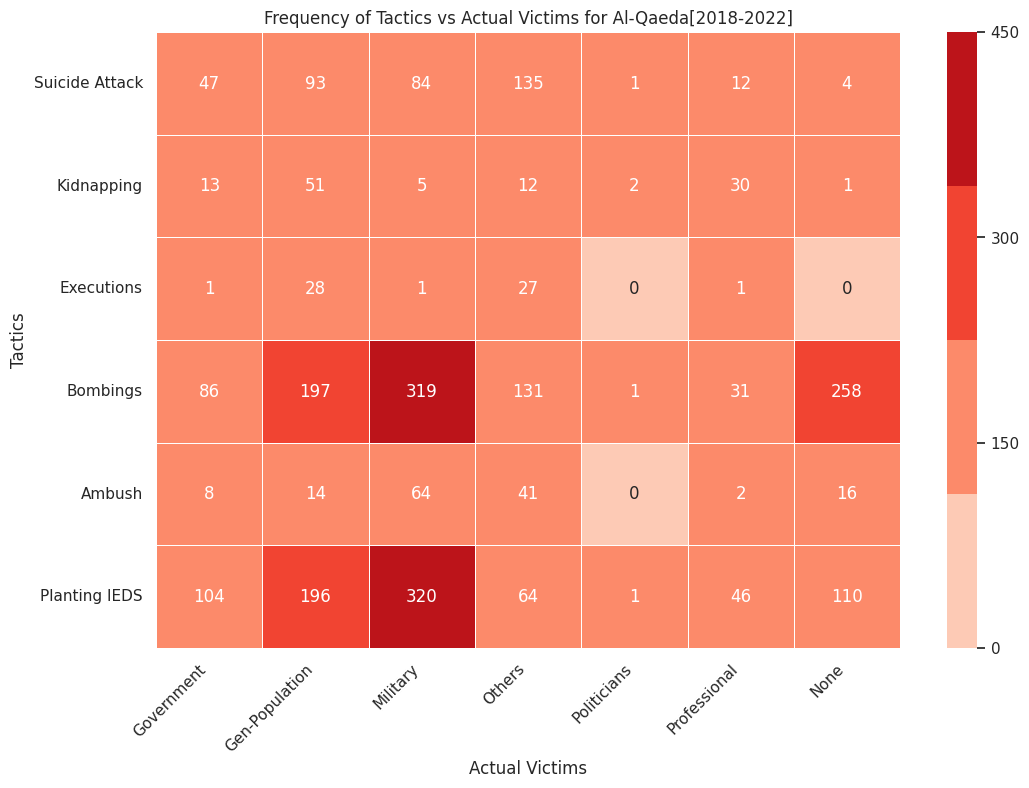

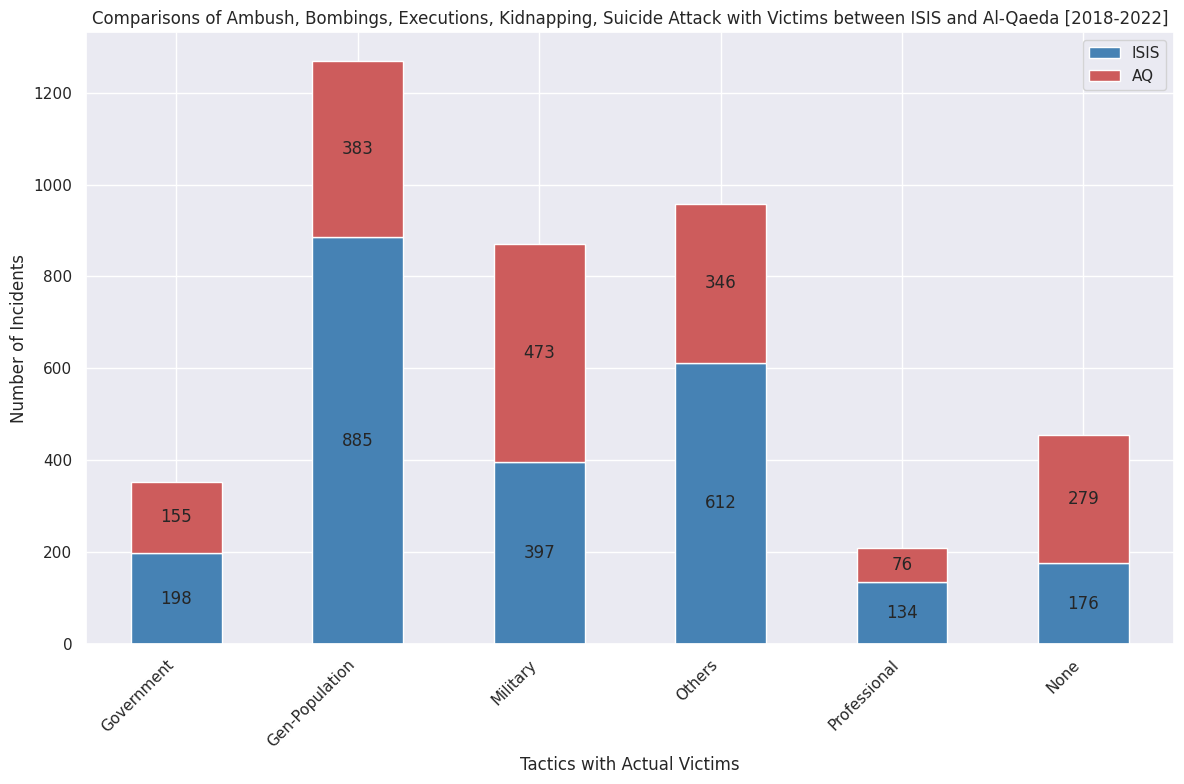

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'tacvsvics.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

sns.set_theme(style="darkgrid")
# Define the columns for tactics and target categories
tactics_columns = ['Suicide Attack', 'Kidnapping', 'Executions', 'Bombings', 'Ambush', 'Planting IEDS']
target_columns = ['Government', 'Gen-Population', 'Military', 'Others', 'Politicians', 'Professional', 'None']

# Filtering data for ISIS and AQ
data_isis = data[data['affiliated_group'] == 'ISIS']
data_aq = data[data['affiliated_group'] == 'AQ']

# Function to create frequency matrix
def create_frequency_matrix(data):
    frequency_matrix = pd.DataFrame(0, index=tactics_columns, columns=target_columns)
    for index, row in data.iterrows():
        for tactic in tactics_columns:
            if row[tactic] == 1:
                for target in target_columns:
                    if row[target] == 1:
                        frequency_matrix.at[tactic, target] += 1
    return frequency_matrix

# Creating frequency matrices for ISIS and AQ
freq_matrix_isis = create_frequency_matrix(data_isis)
freq_matrix_aq = create_frequency_matrix(data_aq)

# Binning function
def bin_matrix_data(matrix, bins):
    """
    Discretize the matrix data into specified bins.
    """
    binned_matrix = matrix.copy()
    for col in matrix.columns:
        for row in matrix.index:
            binned_matrix.at[row, col] = bins[np.digitize(matrix.at[row, col], bins, right=True)]
    return binned_matrix

# Define bins
bins = [0, 150, 300, 450]

# Binning the frequency matrices for ISIS and AQ
frequency_matrix_isis_binned = bin_matrix_data(freq_matrix_isis, bins)
frequency_matrix_aq_binned = bin_matrix_data(freq_matrix_aq, bins)

# Creating custom color palettes
palette_blue = sns.color_palette("Blues", len(bins))
palette_red = sns.color_palette("Reds", len(bins))

# Modified function to create a heatmap with binned colors
def create_heatmap_with_binned_colors(freq_matrix, binned_matrix, title, palette):
    plt.figure(figsize=(12, 8))
    sns.heatmap(binned_matrix, annot=freq_matrix, fmt="d", cmap=palette, 
                cbar_kws={'ticks': bins}, linewidths=.5)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.xlabel('Actual Victims')
    plt.ylabel('Tactics')
    plt.show()

# Create and display the heatmap for ISIS with binned colors
create_heatmap_with_binned_colors(freq_matrix_isis, frequency_matrix_isis_binned, 'Frequency of Tactics vs Actual Victims for ISIS[2018-2022]', palette_blue)

# Create and display the heatmap for AQ with binned colors
create_heatmap_with_binned_colors(freq_matrix_aq, frequency_matrix_aq_binned, 'Frequency of Tactics vs Actual Victims for Al-Qaeda[2018-2022]', palette_red)

df_isis = freq_matrix_isis.drop('Planting IEDS')
df_isis.drop('Politicians', axis=1, inplace=True)

df_aq = freq_matrix_aq.drop('Planting IEDS')
df_aq.drop('Politicians', axis=1, inplace=True)

# Calculating sums of each category for ISIS and AQ
sum_isis = df_isis.sum()
sum_aq =  df_aq.sum()

# Preparing data for stacked bar chart
stacked_bar_data = pd.DataFrame({'ISIS': sum_isis , 'AQ': sum_aq})
stacked_bar_data

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
stacked_bar_data.plot(kind='bar', stacked=True, ax=ax, color = [ 'steelblue', 'indianred'])
# Adding titles and labels
ax.set_title('Comparisons of Ambush, Bombings, Executions, Kidnapping, Suicide Attack with Victims between ISIS and Al-Qaeda [2018-2022]')
ax.set_xlabel('Tactics with Actual Victims')
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
ax.set_xticklabels(stacked_bar_data.index, rotation=45)

# Adding numerical labels to each segment of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # To avoid placing labels on segments with zero height
        ax.text(x+width/2, y+height/2, '{:.0f}'.format(height), horizontalalignment='center', verticalalignment='center')

# Displaying the chart
plt.tight_layout()
plt.show()


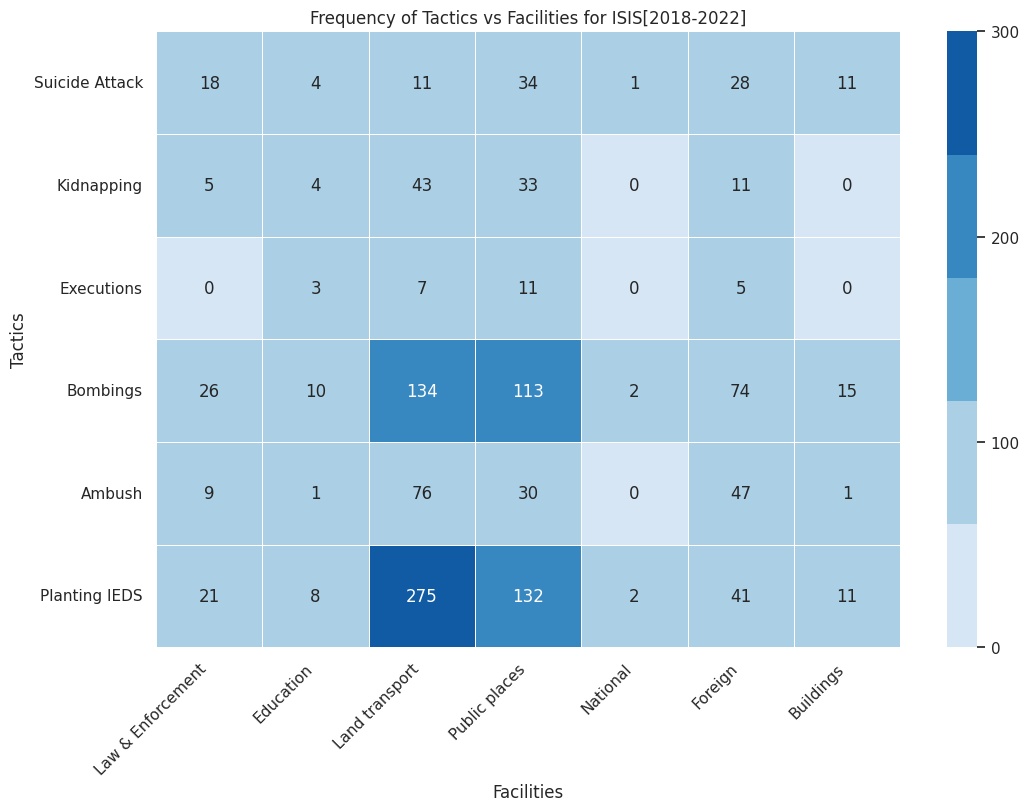

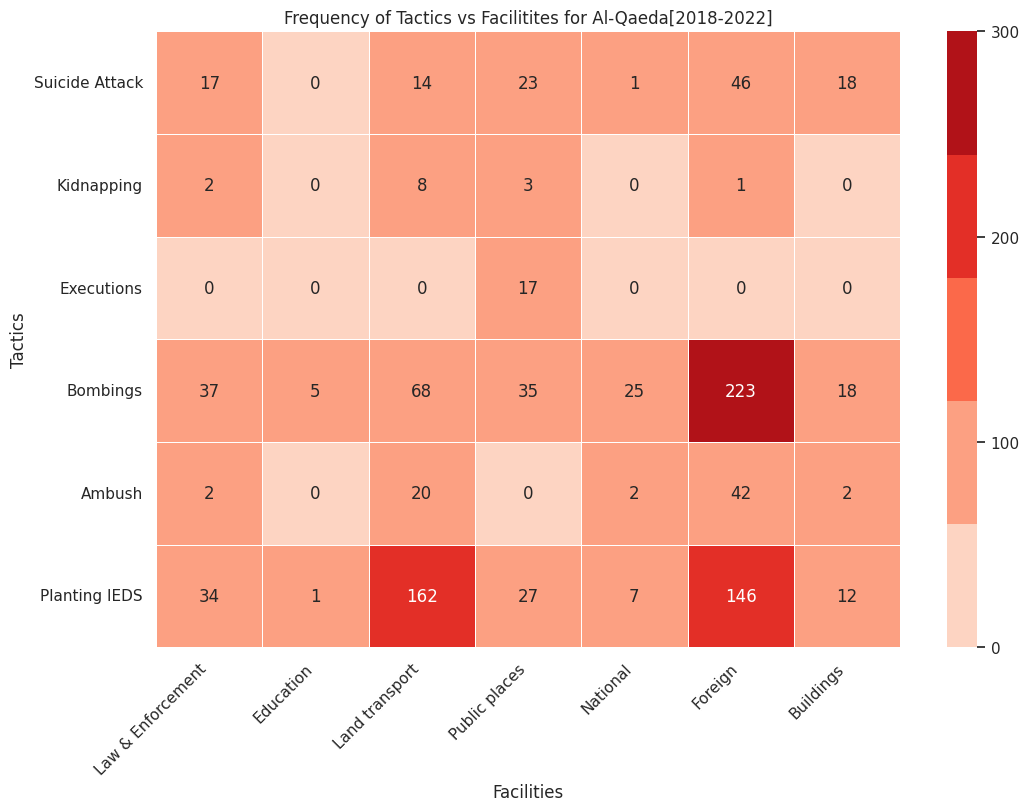

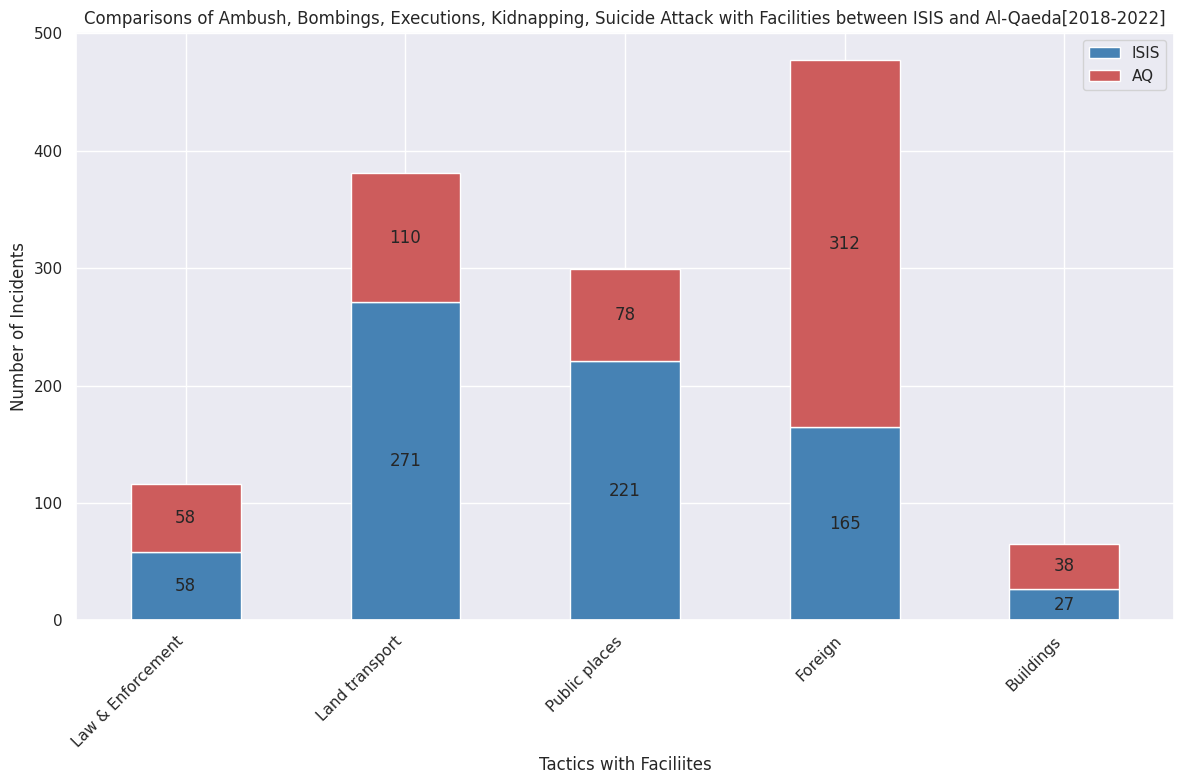

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = 'tacsvsfacs.csv'  

tactics_columns = ['Suicide Attack', 'Kidnapping', 
                   'Executions', 'Bombings', 'Ambush', 'Planting IEDS']
targets_columns = ['Law & Enforcement', 'Education', 'Land transport', 'Public places', 'National', 'Foreign' ,'Buildings']

data = pd.read_csv(file_path)

data_isis = data[data['affiliated_group'] == 'ISIS']
data_aq = data[data['affiliated_group'] == 'AQ']

def create_frequency_matrix(data):
    frequency_matrix = pd.DataFrame(0, index=tactics_columns, columns=targets_columns)
    for index, row in data.iterrows():
        for tactic in tactics_columns:
            if row[tactic] == 1:
                for target in targets_columns:
                    if row[target] == 1:
                        frequency_matrix.at[tactic, target] += 1
    return frequency_matrix

freq_matrix_isis = create_frequency_matrix(data_isis)
freq_matrix_aq = create_frequency_matrix(data_aq)

# Binning function
def bin_matrix_data(matrix, bins):
    """
    Discretize the matrix data into specified bins.
    """
    binned_matrix = matrix.copy()
    for col in matrix.columns:
        for row in matrix.index:
            binned_matrix.at[row, col] = bins[np.digitize(matrix.at[row, col], bins, right=True)]
    return binned_matrix


bins = [0,100,200,300,400]

# Binning the frequency matrices for ISIS and AQ
frequency_matrix_isis_binned = bin_matrix_data(freq_matrix_isis, bins)
frequency_matrix_aq_binned = bin_matrix_data(freq_matrix_aq, bins)

# Creating custom color palettes
palette_blue = sns.color_palette("Blues", len(bins))
palette_red = sns.color_palette("Reds", len(bins))

# Modified function to create a heatmap with binned colors
def create_heatmap_with_binned_colors(freq_matrix, binned_matrix, title, palette):
    plt.figure(figsize=(12, 8))
    sns.heatmap(binned_matrix, annot=freq_matrix, fmt="d", cmap=palette, 
                cbar_kws={'ticks': bins}, linewidths=.5)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.xlabel('Facilities')
    plt.ylabel('Tactics')
    plt.show()

# Create and display the heatmap for ISIS with binned colors
create_heatmap_with_binned_colors(freq_matrix_isis, frequency_matrix_isis_binned, 'Frequency of Tactics vs Facilities for ISIS[2018-2022]', palette_blue)

# Create and display the heatmap for AQ with binned colors
create_heatmap_with_binned_colors(freq_matrix_aq, frequency_matrix_aq_binned, 'Frequency of Tactics vs Facilitites for Al-Qaeda[2018-2022]', palette_red)

#Removing these values as per SME's request
df_isis = freq_matrix_isis.drop('Planting IEDS')
df_isis.drop('National', axis=1, inplace=True)
df_isis.drop('Education', axis=1, inplace=True)

df_aq = freq_matrix_aq.drop('Planting IEDS')
df_aq.drop('National', axis=1, inplace=True)
df_aq.drop('Education', axis=1, inplace=True)

# Calculating sums of each category for ISIS and AQ
sum_isis = df_isis.sum()
sum_aq =  df_aq.sum()

# Preparing data for stacked bar chart
stacked_bar_data = pd.DataFrame({'ISIS': sum_isis , 'AQ': sum_aq})
stacked_bar_data

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
stacked_bar_data.plot(kind='bar', stacked=True, ax=ax, color = [ 'steelblue', 'indianred'])
# Adding titles and labels
ax.set_title('Comparisons of Ambush, Bombings, Executions, Kidnapping, Suicide Attack with Facilities between ISIS and Al-Qaeda[2018-2022]')
ax.set_xlabel('Tactics with Faciliites')
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=100, ha='right')
plt.yticks(rotation=0)
ax.set_xticklabels(stacked_bar_data.index, rotation=45)

# Adding numerical labels to each segment of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # To avoid placing labels on segments with zero height
        ax.text(x+width/2, y+height/2, '{:.0f}'.format(height), horizontalalignment='center', verticalalignment='center')

# Displaying the chart
plt.tight_layout()
plt.show()


In [3]:
#Are terrorist tactics useful in predicting the violence (num of victims killed and wounded) of the perpetrators?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Convert 'num_killed' into a binary outcome where 0 represents no kills, and 1 represents one or more kills
data['num_killed_binary'] = (data['num_killed'] > 0).astype(int)

# Define the specific columns to be used for the updated logistic regression model
selected_columns = [
    'tactic_lvl1_as', 'tactic_lvl1_co', 'tactic_lvl1_cv',
    'tactic_lvl1_tr', 'tactic_lvl1_un', 'tactic_lvl2_tr_03',
    'tactic_lvl2_tr_04', 'tactic_lvl2_tr_05', 'tactic_lvl2_tr_06',
    'tactic_lvl2_tr_02', 'tactic_lvl2_as_04', 'tactic_lvl2_cv_02',
    'tactic_lvl2_cv_04' 
]

# Select the independent variables (tactics) and the dependent variable (binary outcome of num_killed)
X_selected = data[selected_columns]
y = data['num_killed_binary']

# Split the data into training and test sets with the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Instantiate and fit the logistic regression model with the selected features
logistic_model_selected = LogisticRegression()  # Increased max_iter for convergence if needed
logistic_model_selected.fit(X_train_selected, y_train)

# Predict on the test set with the selected features
y_pred_selected = logistic_model_selected.predict(X_test_selected)

# Evaluate the model's performance with the selected features
classification_rep_selected = classification_report(y_test, y_pred_selected)
confusion_mat_selected = confusion_matrix(y_test, y_pred_selected)

# Output the classification report and confusion matrix
print(classification_rep_selected)
print(confusion_mat_selected)

              precision    recall  f1-score   support

           0       0.69      0.34      0.45       480
           1       0.79      0.94      0.86      1284

    accuracy                           0.78      1764
   macro avg       0.74      0.64      0.66      1764
weighted avg       0.76      0.78      0.75      1764

[[ 161  319]
 [  72 1212]]


In [116]:
#Are terrorist tactics useful in predicting the violence (num of victims killed and wounded) of the perpetrators?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns to be used for the updated logistic regression model
selected_columns = [
    'tactic_lvl1_as', 'tactic_lvl1_co', 'tactic_lvl1_cv',
    'tactic_lvl1_tr', 'tactic_lvl1_un', 'tactic_lvl2_tr_03',
    'tactic_lvl2_tr_04', 'tactic_lvl2_tr_05', 'tactic_lvl2_tr_06',
    'tactic_lvl2_tr_02', 'tactic_lvl2_as_04', 'tactic_lvl2_cv_02',
    'tactic_lvl2_cv_04' 
]

# Select the independent variables (tactics) and the dependent variable (binary outcome of num_killed)
X_selected = data[selected_columns]
y = data['claimed']

# Split the data into training and test sets with the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Instantiate and fit the logistic regression model with the selected features
logistic_model_selected = LogisticRegression()
logistic_model_selected.fit(X_train_selected, y_train)

# Predict on the test set with the selected features
y_pred_selected = logistic_model_selected.predict(X_test_selected)

# Evaluate the model's performance with the selected features
classification_rep_selected = classification_report(y_test, y_pred_selected)
confusion_mat_selected = confusion_matrix(y_test, y_pred_selected)

# Output the classification report and confusion matrix
print(classification_rep_selected)
print(confusion_mat_selected)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1368
           1       0.54      0.13      0.21       396

    accuracy                           0.78      1764
   macro avg       0.67      0.55      0.54      1764
weighted avg       0.74      0.78      0.72      1764

[[1325   43]
 [ 345   51]]


              precision    recall  f1-score   support

           0       0.76      0.67      0.71       528
           1       0.87      0.91      0.89      1236

    accuracy                           0.84      1764
   macro avg       0.81      0.79      0.80      1764
weighted avg       0.83      0.84      0.84      1764

[[ 356  172]
 [ 114 1122]]


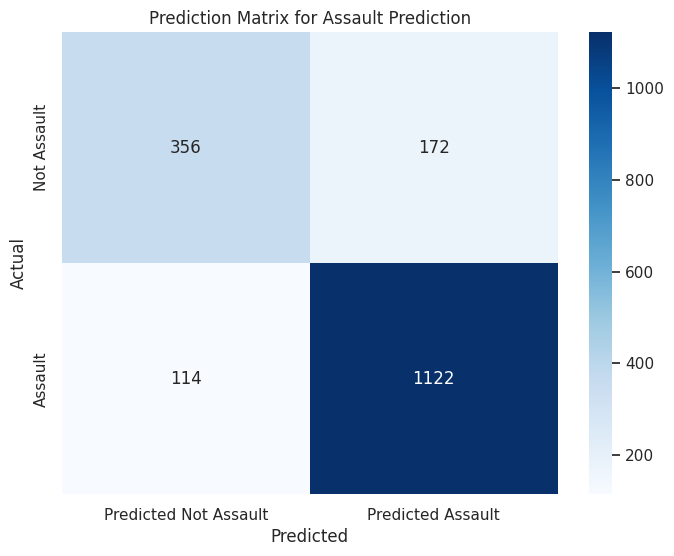

In [14]:
#Do weapon types and victim types influence the decision of group tactics - Assault? 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns for weapon types, victim types, and the dependent variable for group tactics
weapon_columns = [
    'weapon_lvl1_ex', 'weapon_lvl1_fi', 'weapon_lvl1_im',
    'weapon_lvl1_in', 'weapon_lvl1_ml', 'weapon_lvl1_ot',
    'weapon_lvl1_ua', 'weapon_lvl1_un'
]

victim_columns = [
    'victim_lvl1_ci', 'victim_lvl1_go', 'victim_lvl1_gp',
    'victim_lvl1_mi', 'victim_lvl1_ot', 'victim_lvl1_po',
    'victim_lvl1_pr', 'victim_lvl1_nn'
]

# The dependent variable is 'tactic_lvl1_as'
dependent_variable = 'tactic_lvl1_as'

# Check if the dependent variable is binary
if data[dependent_variable].nunique() == 2:
    # Prepare the independent variables (weapon and victim types) and the dependent variable
    X = data[weapon_columns + victim_columns]
    y = data[dependent_variable]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the logistic regression model
    logistic_model_tactics = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence if needed
    logistic_model_tactics.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tactics = logistic_model_tactics.predict(X_test)

    # Evaluate the model's performance
    classification_report_tactics = classification_report(y_test, y_pred_tactics)
    confusion_matrix_tactics = confusion_matrix(y_test, y_pred_tactics)

    # Output the classification report and confusion matrix
    print(classification_report_tactics)
    print(confusion_matrix_tactics)
else:
    raise ValueError("The dependent variable 'tactic_lvl1_as' is not binary and cannot be used for logistic regression.")
    
    
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a confusion matrix plot
cm = confusion_matrix(y_test, y_pred_tactics)
cm_df = pd.DataFrame(cm, index=['Not Assault', 'Assault'], columns=['Predicted Not Assault', 'Predicted Assault'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Prediction Matrix for Assault Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()    

In [104]:
# Do weapon types and victim types influence the decision of group tactics - Co-ordinated? 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns for weapon types, victim types, and the dependent variable for group tactics
weapon_columns = [
    'weapon_lvl1_ex', 'weapon_lvl1_fi', 'weapon_lvl1_im',
    'weapon_lvl1_in', 'weapon_lvl1_ml', 'weapon_lvl1_ot',
    'weapon_lvl1_ua', 'weapon_lvl1_un'
]

victim_columns = [
    'victim_lvl1_ci', 'victim_lvl1_go', 'victim_lvl1_gp',
    'victim_lvl1_mi', 'victim_lvl1_ot', 'victim_lvl1_po',
    'victim_lvl1_pr', 'victim_lvl1_nn'
]

# The dependent variable is 'tactic_lvl1_as'
dependent_variable = 'tactic_lvl1_co'

# Check if the dependent variable is binary
if data[dependent_variable].nunique() == 2:
    # Prepare the independent variables (weapon and victim types) and the dependent variable
    X = data[weapon_columns + victim_columns]
    y = data[dependent_variable]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the logistic regression model
    logistic_model_tactics = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence if needed
    logistic_model_tactics.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tactics = logistic_model_tactics.predict(X_test)

    # Evaluate the model's performance
    classification_report_tactics = classification_report(y_test, y_pred_tactics)
    confusion_matrix_tactics = confusion_matrix(y_test, y_pred_tactics)

    # Output the classification report and confusion matrix
    print(classification_report_tactics)
    print(confusion_matrix_tactics)
else:
    raise ValueError("The dependent variable 'tactic_lvl1_as' is not binary and cannot be used for logistic regression.")

/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1704
           1       0.00      0.00      0.00        60

    accuracy                           0.97      1764
   macro avg       0.48      0.50      0.49      1764
weighted avg       0.93      0.97      0.95      1764

[[1704    0]
 [  60    0]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1336
           1       0.81      0.62      0.70       428

    accuracy                           0.87      1764
   macro avg       0.85      0.79      0.81      1764
weighted avg       0.87      0.87      0.87      1764

[[1273   63]
 [ 162  266]]


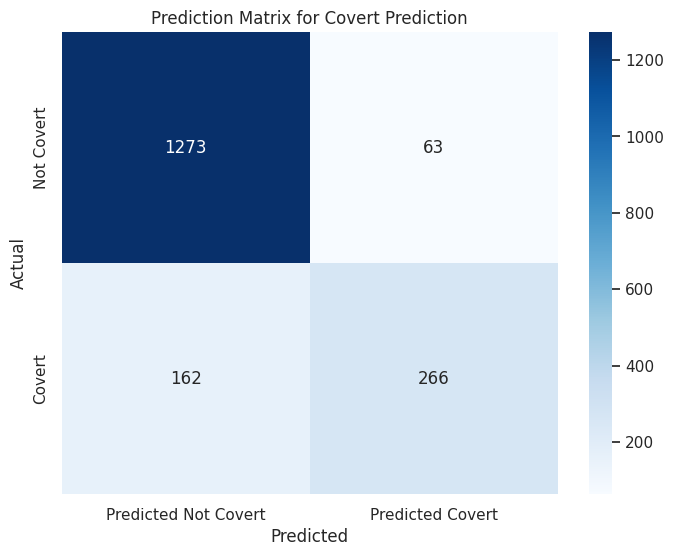

In [15]:
# Do weapon types and victim types influence the decision of group tactics - Covert?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns for weapon types, victim types, and the dependent variable for group tactics
weapon_columns = [
    'weapon_lvl1_ex', 'weapon_lvl1_fi', 'weapon_lvl1_im',
    'weapon_lvl1_in', 'weapon_lvl1_ml', 'weapon_lvl1_ot',
    'weapon_lvl1_ua', 'weapon_lvl1_un'
]

victim_columns = [
    'victim_lvl1_ci', 'victim_lvl1_go', 'victim_lvl1_gp',
    'victim_lvl1_mi', 'victim_lvl1_ot', 'victim_lvl1_po',
    'victim_lvl1_pr', 'victim_lvl1_nn'
]

# The dependent variable is 'tactic_lvl1_as'
dependent_variable = 'tactic_lvl1_cv'

# Check if the dependent variable is binary
if data[dependent_variable].nunique() == 2:
    # Prepare the independent variables (weapon and victim types) and the dependent variable
    X = data[weapon_columns + victim_columns]
    y = data[dependent_variable]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the logistic regression model
    logistic_model_tactics = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence if needed
    logistic_model_tactics.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tactics = logistic_model_tactics.predict(X_test)

    # Evaluate the model's performance
    classification_report_tactics = classification_report(y_test, y_pred_tactics)
    confusion_matrix_tactics = confusion_matrix(y_test, y_pred_tactics)

    # Output the classification report and confusion matrix
    print(classification_report_tactics)
    print(confusion_matrix_tactics)
else:
    raise ValueError("The dependent variable 'tactic_lvl1_as' is not binary and cannot be used for logistic regression.")
    
# Creating a confusion matrix plot
cm = confusion_matrix(y_test, y_pred_tactics)
cm_df = pd.DataFrame(cm, index=['Not Covert', 'Covert'], columns=['Predicted Not Covert', 'Predicted Covert'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Prediction Matrix for Covert Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()  

In [109]:
# Do weapon types and victim types influence the decision of group tactics - Exploitative? 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns for weapon types, victim types, and the dependent variable for group tactics
weapon_columns = [
    'weapon_lvl1_ex', 'weapon_lvl1_fi', 'weapon_lvl1_im',
    'weapon_lvl1_in', 'weapon_lvl1_ml', 'weapon_lvl1_ot',
    'weapon_lvl1_ua', 'weapon_lvl1_un'
]

victim_columns = [
    'victim_lvl1_ci', 'victim_lvl1_go', 'victim_lvl1_gp',
    'victim_lvl1_mi', 'victim_lvl1_ot', 'victim_lvl1_po',
    'victim_lvl1_pr', 'victim_lvl1_nn'
]

# The dependent variable is 'tactic_lvl1_as'
dependent_variable = 'tactic_lvl1_ex'

# Check if the dependent variable is binary
if data[dependent_variable].nunique() == 2:
    # Prepare the independent variables (weapon and victim types) and the dependent variable
    X = data[weapon_columns + victim_columns]
    y = data[dependent_variable]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the logistic regression model
    logistic_model_tactics = LogisticRegression()  # Increased max_iter for convergence if needed
    logistic_model_tactics.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tactics = logistic_model_tactics.predict(X_test)

    # Evaluate the model's performance
    classification_report_tactics = classification_report(y_test, y_pred_tactics)
    confusion_matrix_tactics = confusion_matrix(y_test, y_pred_tactics)

    # Output the classification report and confusion matrix
    print(classification_report_tactics)
    print(confusion_matrix_tactics)
else:
    raise ValueError("The dependent variable 'tactic_lvl1_as' is not binary and cannot be used for logistic regression.")

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1647
           1       0.51      0.19      0.28       117

    accuracy                           0.93      1764
   macro avg       0.73      0.59      0.62      1764
weighted avg       0.92      0.93      0.92      1764

[[1626   21]
 [  95   22]]


In [107]:
# Do weapon types and victim types influence the decision of group tactics - Trauma? 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns for weapon types, victim types, and the dependent variable for group tactics
weapon_columns = [
    'weapon_lvl1_ex', 'weapon_lvl1_fi', 'weapon_lvl1_im',
    'weapon_lvl1_in', 'weapon_lvl1_ml', 'weapon_lvl1_ot',
    'weapon_lvl1_ua', 'weapon_lvl1_un'
]

victim_columns = [
    'victim_lvl1_ci', 'victim_lvl1_go', 'victim_lvl1_gp',
    'victim_lvl1_mi', 'victim_lvl1_ot', 'victim_lvl1_po',
    'victim_lvl1_pr', 'victim_lvl1_nn'
]

# The dependent variable is 'tactic_lvl1_as'
dependent_variable = 'tactic_lvl1_tr'

# Check if the dependent variable is binary
if data[dependent_variable].nunique() == 2:
    # Prepare the independent variables (weapon and victim types) and the dependent variable
    X = data[weapon_columns + victim_columns]
    y = data[dependent_variable]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the logistic regression model
    logistic_model_tactics = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence if needed
    logistic_model_tactics.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tactics = logistic_model_tactics.predict(X_test)

    # Evaluate the model's performance
    classification_report_tactics = classification_report(y_test, y_pred_tactics)
    confusion_matrix_tactics = confusion_matrix(y_test, y_pred_tactics)

    # Output the classification report and confusion matrix
    print(classification_report_tactics)
    print(confusion_matrix_tactics)
else:
    raise ValueError("The dependent variable 'tactic_lvl1_as' is not binary and cannot be used for logistic regression.")

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1422
           1       0.77      0.22      0.34       342

    accuracy                           0.84      1764
   macro avg       0.81      0.60      0.62      1764
weighted avg       0.83      0.84      0.80      1764

[[1400   22]
 [ 268   74]]


In [4]:
%pip install seaborn

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1581
           1       0.63      0.77      0.69       183

    accuracy                           0.93      1764
   macro avg       0.80      0.86      0.83      1764
weighted avg       0.94      0.93      0.93      1764

[[1499   82]
 [  43  140]]


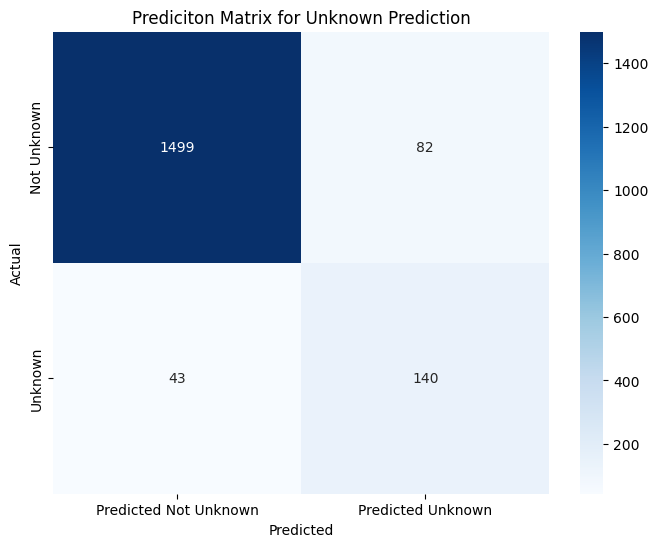

In [7]:
# Do weapon types and victim types influence the decision of group tactics - Unknown?
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the data
data = pd.read_csv(r'aq_isis_regressiondata.csv')  # Replace with the correct path to your CSV file

# Define the specific columns for weapon types, victim types, and the dependent variable for group tactics
weapon_columns = [
    'weapon_lvl1_ex', 'weapon_lvl1_fi', 'weapon_lvl1_im',
    'weapon_lvl1_in', 'weapon_lvl1_ml', 'weapon_lvl1_ot',
    'weapon_lvl1_ua', 'weapon_lvl1_un'
]

victim_columns = [
    'victim_lvl1_ci', 'victim_lvl1_go', 'victim_lvl1_gp',
    'victim_lvl1_mi', 'victim_lvl1_ot', 'victim_lvl1_po',
    'victim_lvl1_pr', 'victim_lvl1_nn'
]

# The dependent variable is 'tactic_lvl1_as'
dependent_variable = 'tactic_lvl1_un'


# Check if the dependent variable is binary
if data[dependent_variable].nunique() == 2:
    # Prepare the independent variables (weapon and victim types) and the dependent variable
    X = data[weapon_columns + victim_columns]
    y = data[dependent_variable]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and fit the logistic regression model
    logistic_model_tactics = LogisticRegression()  # Increased max_iter for convergence if needed
    logistic_model_tactics.fit(X_train, y_train)

    # Predict on the test set
    y_pred_tactics = logistic_model_tactics.predict(X_test)

    # Evaluate the model's performance
    classification_report_tactics = classification_report(y_test, y_pred_tactics)
    confusion_matrix_tactics = confusion_matrix(y_test, y_pred_tactics)

    # Output the classification report and confusion matrix
    print(classification_report_tactics)
    print(confusion_matrix_tactics)
else:
    raise ValueError("The dependent variable 'tactic_lvl1_as' is not binary and cannot be used for logistic regression.")
    
# Creating a confusion matrix plot
cm = confusion_matrix(y_test, y_pred_tactics)
cm_df = pd.DataFrame(cm, index=['Not Unknown', 'Unknown'], columns=['Predicted Not Unknown', 'Predicted Unknown'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Prediciton Matrix for Unknown Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()      
